## Analysis of the similarity and the average within age ranges

### Requirements

File needed to run this notebook: "AgeDB_Sim_Feat_Result.csv" (produced by AgeDB_Code_2.ipynb) and "AgeDB_Cleaned_Individual.csv" (produced by AgeDB_Code.ipynb).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
# Get our latest dataframe

df_images = pd.read_csv("../ProjectFaceRec.nosync/AgeDB_Sim_Feat_Result.csv")
df_images


,Unnamed: 0,ID,Name,Gender,Model,First Image,First Age,First Age Range,First Image Features,Second Image,Second Age,Second Age Range,Second Image Features,Cosine Similarity
0,0,4,HelenHunt,0,buffalo_l,10053_HelenHunt_39_f.jpg,39,31-40,[-3.12238298e-02 1.06533375e-02 7.72021413e-...,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,0.709523
1,1,4,HelenHunt,0,buffalo_l,10053_HelenHunt_39_f.jpg,39,31-40,[-3.12238298e-02 1.06533375e-02 7.72021413e-...,10046_HelenHunt_34_f.jpg,34,31-40,[-2.37687211e-02 -3.99875361e-03 5.16198725e-...,0.648489
2,2,4,HelenHunt,0,buffalo_l,10053_HelenHunt_39_f.jpg,39,31-40,[-3.12238298e-02 1.06533375e-02 7.72021413e-...,10051_HelenHunt_37_f.jpg,37,31-40,[-4.79663238e-02 1.64809525e-02 -4.03776951e-...,0.684564
3,3,4,HelenHunt,0,buffalo_l,10053_HelenHunt_39_f.jpg,39,31-40,[-3.12238298e-02 1.06533375e-02 7.72021413e-...,10050_HelenHunt_37_f.jpg,37,31-40,[-5.50042726e-02 3.68939005e-02 2.77201869e-...,0.606415
4,4,4,HelenHunt,0,buffalo_l,10053_HelenHunt_39_f.jpg,39,31-40,[-3.12238298e-02 1.06533375e-02 7.72021413e-...,10049_HelenHunt_36_f.jpg,36,31-40,[-0.03986527 0.01015108 0.07416099 0.009403...,0.722155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176526,176526,566,ElkeSommer,0,buffalo_l,9972_ElkeSommer_63_f.jpg,63,61-70,[ 7.69860968e-02 -8.08814913e-02 -4.46359515e-...,9975_ElkeSommer_67_f.jpg,67,61-70,[ 2.64054723e-02 -5.44106103e-02 -2.20713485e-...,0.804749
176527,176527,566,ElkeSommer,0,buffalo_l,9972_ElkeSommer_63_f.jpg,63,61-70,[ 7.69860968e-02 -8.08814913e-02 -4.46359515e-...,9962_ElkeSommer_44_f.jpg,44,41-50,[ 3.94389257e-02 -6.26973733e-02 -4.01959047e-...,0.623625
176528,176528,566,ElkeSommer,0,buffalo_l,9973_ElkeSommer_64_f.jpg,64,61-70,[ 7.81833008e-03 -7.26524964e-02 -5.03539816e-...,9975_ElkeSommer_67_f.jpg,67,61-70,[ 2.64054723e-02 -5.44106103e-02 -2.20713485e-...,0.699520
176529,176529,566,ElkeSommer,0,buffalo_l,9973_ElkeSommer_64_f.jpg,64,61-70,[ 7.81833008e-03 -7.26524964e-02 -5.03539816e-...,9962_ElkeSommer_44_f.jpg,44,41-50,[ 3.94389257e-02 -6.26973733e-02 -4.01959047e-...,0.591983


In [5]:
# Find pictures with incorrect sizes
from PIL import Image

df_images_sq = pd.read_csv("../ProjectFaceRec.nosync/AgeDB_Sim_Feat_Result.csv")

path_to_original = "../ProjectFaceRec.nosync/AgeDB/"
all_images_list = np.unique(df_images_sq['First Image'].to_list())

for im in all_images_list:
    if im == "94_PaulAnka_17_m.jpg":
        pass
    else:
        image = Image.open(path_to_original + str(im))
        diff_in_size = abs(image.size[0] - image.size[1])
        if diff_in_size > 0:
            df_images_sq.drop(df_images_sq.loc[df_images_sq["First Image"] == im].index, inplace=True)
df_images_sq

,Unnamed: 0,ID,Name,Gender,Model,First Image,First Age,First Age Range,First Image Features,Second Image,Second Age,Second Age Range,Second Image Features,Cosine Similarity
37,37,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10046_HelenHunt_34_f.jpg,34,31-40,[-2.37687211e-02 -3.99875361e-03 5.16198725e-...,0.675845
38,38,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10051_HelenHunt_37_f.jpg,37,31-40,[-4.79663238e-02 1.64809525e-02 -4.03776951e-...,0.707469
39,39,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10050_HelenHunt_37_f.jpg,37,31-40,[-5.50042726e-02 3.68939005e-02 2.77201869e-...,0.585313
40,40,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10049_HelenHunt_36_f.jpg,36,31-40,[-0.03986527 0.01015108 0.07416099 0.009403...,0.754621
41,41,4,HelenHunt,0,buffalo_l,10052_HelenHunt_38_f.jpg,38,31-40,[-6.19424321e-02 1.54614570e-02 7.51559809e-...,10048_HelenHunt_35_f.jpg,35,31-40,[-3.83438580e-02 -4.08570794e-03 4.98428904e-...,0.718126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176520,176520,566,ElkeSommer,0,buffalo_l,9970_ElkeSommer_61_f.jpg,61,61-70,[ 3.34328152e-02 -9.95962918e-02 -1.84935257e-...,9962_ElkeSommer_44_f.jpg,44,41-50,[ 3.94389257e-02 -6.26973733e-02 -4.01959047e-...,0.615266
176521,176521,566,ElkeSommer,0,buffalo_l,9971_ElkeSommer_62_f.jpg,62,61-70,[ 1.75836030e-02 -8.81809667e-02 -2.66958829e-...,9972_ElkeSommer_63_f.jpg,63,61-70,[ 7.69860968e-02 -8.08814913e-02 -4.46359515e-...,0.869986
176522,176522,566,ElkeSommer,0,buffalo_l,9971_ElkeSommer_62_f.jpg,62,61-70,[ 1.75836030e-02 -8.81809667e-02 -2.66958829e-...,9973_ElkeSommer_64_f.jpg,64,61-70,[ 7.81833008e-03 -7.26524964e-02 -5.03539816e-...,0.727862
176523,176523,566,ElkeSommer,0,buffalo_l,9971_ElkeSommer_62_f.jpg,62,61-70,[ 1.75836030e-02 -8.81809667e-02 -2.66958829e-...,9975_ElkeSommer_67_f.jpg,67,61-70,[ 2.64054723e-02 -5.44106103e-02 -2.20713485e-...,0.754011


In [6]:
# Saving new datafram

df_images_sq.to_csv("../ProjectFaceRec.nosync/AgeDB_Sim_Feat_Result_Square.csv")

In [4]:
# Meta data for each individual person

df_individual = pd.read_csv("../ProjectFaceRec.nosync/AgeDB_Cleaned_Individual.csv")
df_individual

,Unnamed: 0,ID,Name,Min Age,Max Age,Age Span,Number of Age Ranges,Number of Images,Gender
0,0,4,HelenHunt,10,51,41,6,38,0.0
1,1,5,JaneBirkin,19,68,49,6,39,0.0
2,2,6,PaulAnka,15,72,57,7,42,1.0
3,3,7,JaneFonda,25,74,49,6,30,0.0
4,4,14,MarietteHartley,21,73,52,6,33,0.0
...,...,...,...,...,...,...,...,...,...
267,267,556,MegRyan,7,77,70,7,34,0.0
268,268,557,DorisDay,17,82,65,7,49,0.0
269,269,559,JaneAsher,6,67,61,7,34,0.0
270,270,565,AliMacGraw,25,74,49,6,34,0.0


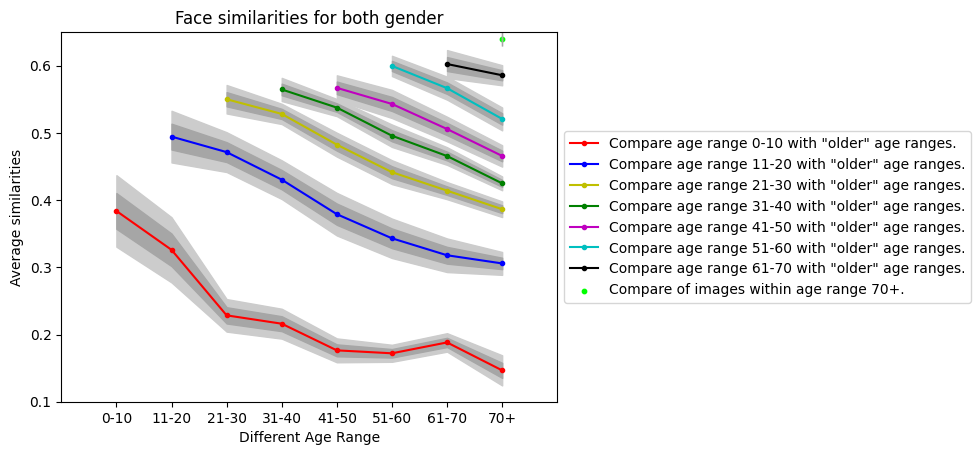

(                Name  0-10_vs_0-10  0-10_vs_11-20  0-10_vs_21-30  \
 0          HelenHunt           NaN       0.425726       0.249645   
 1         JaneBirkin           NaN            NaN            NaN   
 2           PaulAnka           NaN            NaN            NaN   
 3          JaneFonda           NaN            NaN            NaN   
 4    MarietteHartley           NaN            NaN            NaN   
 ..               ...           ...            ...            ...   
 267          MegRyan           NaN       0.238872       0.151102   
 268         DorisDay           NaN            NaN            NaN   
 269        JaneAsher      0.224683       0.277253       0.241460   
 270       AliMacGraw           NaN            NaN            NaN   
 271       ElkeSommer           NaN            NaN            NaN   
 
      0-10_vs_31-40  0-10_vs_41-50  0-10_vs_51-60  0-10_vs_61-70  0-10_vs_70+  \
 0         0.221217       0.190833       0.197083            NaN          NaN   
 1      

In [139]:
# Function to produce similarity dataframe and plot

def produce_similarity_result(df_large, df_indi, gender='all', fill_var='yes'):
    """
    Purpose: Function to produce a dataframe with average similarities and an explanatory plot

    Input:

    Output: 
    
    """

    # Part 1: Creating a dataframe with all average similarities

    # Creating an empty dataframe
    ranges = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
    combo_ranges = []
    for i in range(len(ranges)):
        for j in range(i, len(ranges)):
            key = str(ranges[i]) + '_vs_' + str(ranges[j])
            combo_ranges.append(key)

    df_average_simi = pd.DataFrame(columns=["Name"] + combo_ranges)

    unique_id_list = df_indi["ID"].to_list()

    for id in unique_id_list:
        
        # Creating a dict where all values from one person is stored
        dict_average_person = {}
        for i in combo_ranges:
            dict_average_person[i] = []
        
        all_rows_id = df_large.loc[df_large["ID"] == id]
        individual_gender = df_indi.loc[df_indi["ID"] == id, "Gender"].values[0]
        if (gender != individual_gender) and (gender != 'all'):
            pass
        else:
            individual_name = df_indi.loc[df_indi["ID"] == id, "Name"].values[0]
            first_ranges = all_rows_id["First Age Range"].to_list()
            second_ranges = all_rows_id["Second Age Range"].to_list()
            sims = all_rows_id["Cosine Similarity"].to_list()
            
            number_of_comp = len(first_ranges)
            for i in range(number_of_comp):
                comparison = str(first_ranges[i]) + '_vs_' + str(second_ranges[i])
                
                if int(first_ranges[i][0]) > int(second_ranges[i][0]):
                    comparison = str(second_ranges[i]) + '_vs_' + str(first_ranges[i])
                
                dict_average_person[comparison].append(sims[i])

            temp_values = []
            temp_values.append(individual_name)
            for key, value in dict_average_person.items():

                if len(value) == 0:
                    dict_average_person[key] = np.NaN
                    temp_values.append(dict_average_person[key])
                else:
                    dict_average_person[key] = np.average(value)
                    temp_values.append(dict_average_person[key])

            df_average_simi.loc[len(df_average_simi)] = temp_values
    

    # Part 2: Creating a dictionary with the results
    result_dict = {}
    for age_combo in combo_ranges:
        result_dict[age_combo] = [df_average_simi[age_combo].mean(axis=0,skipna=True), df_average_simi[age_combo].var(axis=0,skipna=True), df_average_simi[age_combo].std(axis=0,skipna=True)]  
    
    # Part 3: Plotting result
    y_0_10, y_11_20, y_21_30, y_31_40, y_41_50, y_51_60, y_61_70, y_70  = [], [], [], [], [], [], [], []
    var_0_10, var_11_20, var_21_30, var_31_40, var_41_50, var_51_60, var_61_70, var_70 = [], [], [], [], [], [], [], []

    for key, value in result_dict.items():

        

        if key[0] == '0':
            y_0_10.append(value[0])
            var_0_10.append(value[1])
        elif key[0] == '1':
            y_11_20.append(value[0])
            var_11_20.append(value[1])
        elif key[0] == '2':
            y_21_30.append(value[0])
            var_21_30.append(value[1])
        elif key[0] == '3':
            y_31_40.append(value[0])
            var_31_40.append(value[1])
        elif key[0] == '4':
            y_41_50.append(value[0])
            var_41_50.append(value[1])
        elif key[0] == '5':
            y_51_60.append(value[0])
            var_51_60.append(value[1])
        elif key[0] == '6':
            y_61_70.append(value[0])
            var_61_70.append(value[1])
        elif key[0] == '7':
            y_70.append(value[0])
            var_70.append(value[1])


    x_plot_points = [i for i in range(8)]
    x_ticks = ranges
    plt.xticks(x_plot_points, x_ticks)
    plt.ylim(0.1,0.65)
    plt.xlim(-1,8)
    plt.xlabel("Different Age Range")
    plt.ylabel("Average similarities")
    
    if gender == 0:
        gender = 'males only'
    elif gender == 1:
        gender = 'females only'
    else:
        gender = 'both gender'

    plt.title(f"Face similarities for {gender}")

    # Plotting similarity points
    plt.plot(x_plot_points, y_0_10, '.r-', label='Compare age range 0-10 with "older" age ranges.')
    plt.plot(x_plot_points[1:], y_11_20, '.b-', label='Compare age range 11-20 with "older" age ranges.')
    plt.plot(x_plot_points[2:], y_21_30, '.y-', label='Compare age range 21-30 with "older" age ranges.')
    plt.plot(x_plot_points[3:], y_31_40, '.g-', label='Compare age range 31-40 with "older" age ranges.')
    plt.plot(x_plot_points[4:], y_41_50, '.m-', label='Compare age range 41-50 with "older" age ranges.')
    plt.plot(x_plot_points[5:], y_51_60, '.c-', label='Compare age range 51-60 with "older" age ranges.')
    plt.plot(x_plot_points[6:], y_61_70, '.k-', label='Compare age range 61-70 with "older" age ranges.')
    plt.scatter(x_plot_points[7:], y_70, c='lime', s=10, label='Compare of images within age range 70+.')


    # Plotting variance 
    if fill_var == 'yes':
        for i in [2,1]:
            over_0_10, under_0_10 = np.array(y_0_10) + i*np.array(var_0_10), np.array(y_0_10) - i*np.array(var_0_10)
            over_11_20, under_11_20 = np.array(y_11_20) + i*np.array(var_11_20), np.array(y_11_20) - i*np.array(var_11_20)
            over_21_30, under_21_30 = np.array(y_21_30) + i*np.array(var_21_30), np.array(y_21_30) - i*np.array(var_21_30)
            over_31_40, under_31_40 = np.array(y_31_40) + i*np.array(var_31_40), np.array(y_31_40) - i*np.array(var_31_40)
            over_41_50, under_41_50 = np.array(y_41_50) + i*np.array(var_41_50), np.array(y_41_50) - i*np.array(var_41_50)
            over_51_60, under_51_60 = np.array(y_51_60) + i*np.array(var_51_60), np.array(y_51_60) - i*np.array(var_51_60)
            over_61_70, under_61_70 = np.array(y_61_70) + i*np.array(var_61_70), np.array(y_61_70) - i*np.array(var_61_70)
            over_70, under_70 = np.array(y_70) + np.array(var_70), np.array(y_70) - np.array(var_70)


            plt.fill_between(x_plot_points, over_0_10, under_0_10, where=(over_0_10 > under_0_10), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[1:], over_11_20, under_11_20, where=(over_11_20 > under_11_20), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[2:], over_21_30, under_21_30, where=(over_21_30 > under_21_30), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[3:], over_31_40, under_31_40, where=(over_31_40 > under_31_40), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[4:], over_41_50, under_41_50, where=(over_41_50 > under_41_50), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[5:], over_51_60, under_51_60, where=(over_51_60 > under_51_60), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[6:], over_61_70, under_61_70, where=(over_61_70 > under_61_70), color=str(0.5 + 0.15*i))
            plt.fill_between(x_plot_points[7:], over_70, under_70, where=(over_70 > under_70), color=str(0.5 + 0.15*i))


    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    return df_average_simi, result_dict
    



produce_similarity_result(df_images_sq, df_individual, gender='all', fill_var='yes')
    

## Analysis of each feature vector - PCA and clustering methods

In [140]:
# PCA for multiple persons

list_of_images = np.unique(df_images_sq["First Image"].to_list())

column_list = ['feat' + str(i) for i in range(512)] + ['target (age range)']
df_features = pd.DataFrame(columns=column_list)

for filename in list_of_images:
    feature_vector = df_images_sq.loc[df_images_sq["First Image"] == filename, "First Image Features"].values[0]
    age_range = df_images_sq.loc[df_images_sq["First Image"] == filename, "First Age Range"].values[0]
    feature_vector = feature_vector[1:-1].split(" ")
    feat = []
    for i in feature_vector:
        if len(i) != 0:
            i = i.replace("\n", "")
            feat.append(float(i))
    feat.append(age_range)
    df_features.loc[len(df_features)] = feat

df_features

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat503,feat504,feat505,feat506,feat507,feat508,feat509,feat510,feat511,target (age range)
0,-0.030975,-0.018429,0.056826,0.044261,-0.002288,0.013347,-0.005840,-0.004569,-0.032212,-0.056636,...,0.001996,-0.017541,0.018765,0.011028,0.086406,0.036758,0.087844,-0.047670,-0.013216,0-10
1,-0.034724,-0.032644,0.056053,0.055067,-0.011145,0.000775,-0.044776,-0.035698,-0.074070,-0.029528,...,-0.060463,0.054824,0.031190,0.024179,0.078276,0.054881,0.048441,-0.028744,-0.008298,11-20
2,-0.054999,0.001313,0.093602,0.017872,-0.011205,-0.046207,-0.017676,-0.002431,-0.086295,-0.003667,...,-0.020810,0.048663,0.043089,-0.008419,0.129458,-0.046015,0.066236,0.050030,-0.042613,11-20
3,-0.092308,-0.018353,0.040140,-0.058428,0.005133,-0.066332,-0.023554,-0.024644,-0.024660,0.060238,...,0.006975,0.028976,-0.014344,-0.017701,0.023498,-0.029026,0.101450,0.017267,-0.035720,21-30
4,-0.079484,0.042401,0.073189,0.013497,0.064739,-0.036970,-0.069424,-0.085144,-0.068268,0.032884,...,0.006505,0.047168,0.022545,0.011394,0.028247,-0.032918,0.056766,0.042097,0.025316,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,0.033433,-0.099596,-0.018494,-0.022200,-0.004065,0.066628,-0.001212,-0.030185,0.015552,-0.040539,...,0.021605,0.036838,-0.069228,0.024507,-0.073702,0.011665,-0.052929,-0.041869,0.007757,61-70
4687,0.017584,-0.088181,-0.026696,-0.016359,-0.044850,0.021846,0.009062,0.007478,0.016987,0.004631,...,0.053946,0.091995,-0.103283,0.009010,-0.038242,-0.047031,-0.033433,-0.036871,-0.036417,61-70
4688,0.040451,-0.079277,-0.013817,-0.010564,0.014420,0.058880,-0.015882,0.032508,0.053558,-0.006227,...,0.055462,0.028286,-0.077422,0.002658,-0.076678,0.007254,-0.024150,0.009550,-0.040598,61-70
4689,-0.006737,-0.086470,-0.026552,0.018696,0.054587,0.058381,-0.010655,-0.000851,0.009401,0.011941,...,-0.011022,0.037956,-0.041860,-0.022493,-0.066100,-0.020525,0.077627,0.008562,-0.029269,61-70


In [141]:
from sklearn.preprocessing import StandardScaler

features_list = column_list[:-1]

# Separating out the features
X = df_features.loc[:, features_list].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

principalComponents = pca.fit_transform(X)

df_principal = pd.DataFrame(data = principalComponents
             , columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

df_pca_result = pd.concat([df_principal, df_features[['target (age range)']]], axis = 1)
df_pca_result


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,target (age range)
0,1.534241,-1.036164,1.105811,-2.226255,-2.140421,0-10
1,0.260827,0.369709,-0.238418,-4.295093,0.480928,11-20
2,-1.027620,-1.662464,-0.358820,-2.164467,0.923958,11-20
3,1.027799,-3.499073,-1.579030,-1.267277,0.233031,21-30
4,1.246965,-3.150280,-0.911157,-2.933198,-0.878708,21-30
...,...,...,...,...,...,...
4686,3.173779,3.434926,-0.491308,1.894290,-2.858520,61-70
4687,0.649425,4.030492,-2.616705,1.051251,-1.229576,61-70
4688,1.279027,4.699085,-1.753773,0.453976,-2.606293,61-70
4689,0.771309,4.919171,-1.207883,0.785635,-3.246265,61-70


In [143]:
# We can already here conclude that none of the components capture age
pca.explained_variance_ratio_

array([0.01504443, 0.01330176, 0.01288828, 0.01235601, 0.01175329])

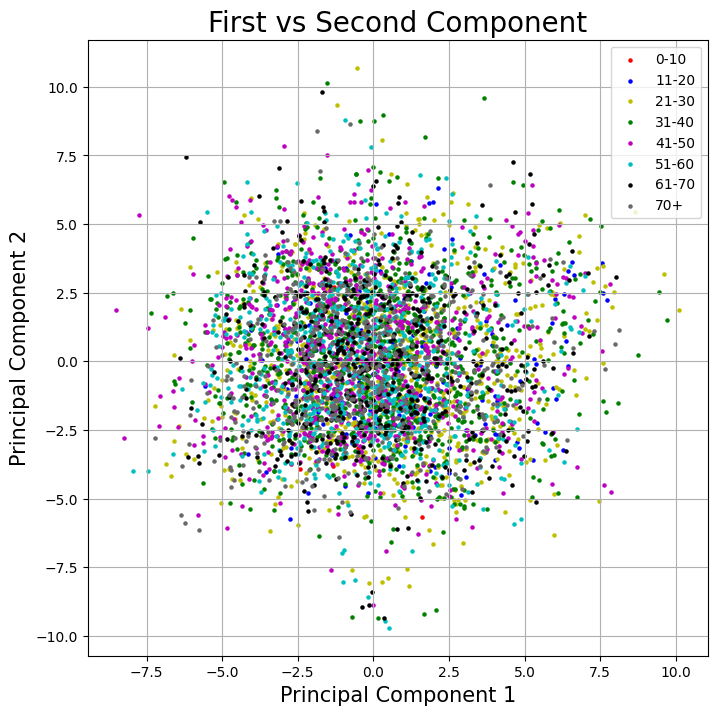

In [144]:
# Plotting first and second component

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First vs Second Component', fontsize = 20)
targets = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
colors = ['r', 'b', 'y', 'g', 'm', 'c', 'k', 'dimgray']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_result['target (age range)'] == target
    ax.scatter(df_pca_result.loc[indicesToKeep, 'Principal Component 1']
               , df_pca_result.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

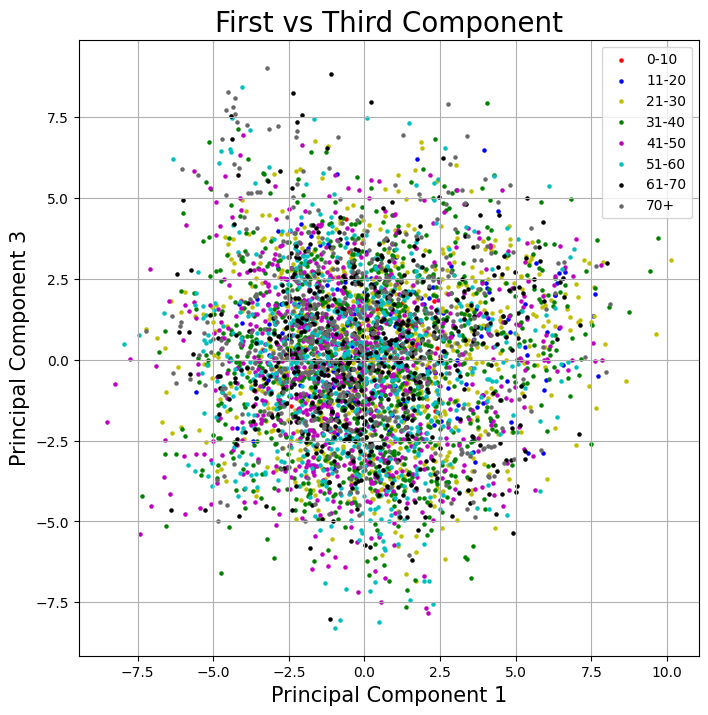

In [145]:
# Plotting first and third component

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('First vs Third Component', fontsize = 20)
targets = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
colors = ['r', 'b', 'y', 'g', 'm', 'c', 'k', 'dimgray']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_result['target (age range)'] == target
    ax.scatter(df_pca_result.loc[indicesToKeep, 'Principal Component 1']
               , df_pca_result.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

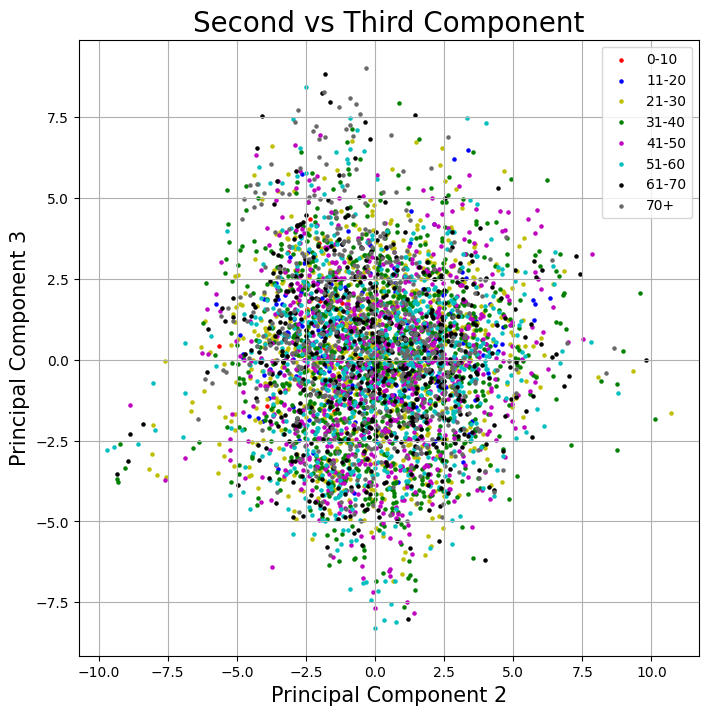

In [146]:
# Plotting second and third component

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('Second vs Third Component', fontsize = 20)
targets = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
colors = ['r', 'b', 'y', 'g', 'm', 'c', 'k', 'dimgray']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca_result['target (age range)'] == target
    ax.scatter(df_pca_result.loc[indicesToKeep, 'Principal Component 2']
               , df_pca_result.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()